# CMT309/CMT315 - F2F Session 1
## `pandas` and Data Visualisation (06/02/2023 - Monday)

#### This example is constructed to remind you using `pandas` and `numpy` modules, and with several additional examples of **data visualisation**. 

#### You are given `csv` file which consists of 2021-2022 US National Basketball League NBA Play-off Series player statistics. For each player belongs to NBA teams taken part in Play-offs previous year, there are several important statistics, such as minutes per game, 3 points percentages, etc. (For details of each column please check the text files "columns_explained.txt") 

#### You are given a code block below, which imports important modules and downloads the data automatically. Please run it before starting the exercise.

In [12]:
import pandas as pd
import numpy as np
#from urllib import request
""" module_url = f"https://drive.google.com/uc?export=view&id=1rGxCadYZxWBbI2E_IvKWF33MFD3zA9oz"
module_name = '21-22 NBA Player Stats.csv'
print(f'Fetching {module_url}')
with request.urlopen(module_url) as f, open(module_name,'w') as outf:
  a = f.read()
  outf.write(a.decode('utf-8'))
module_url2 = f"https://drive.google.com/uc?export=view&id=1uK28ayr9o-ILLYDCikzvwIqZ3KCmdj7d"
module_name2 = 'columns_explained.txt'
print(f'Fetching {module_url2}')
with request.urlopen(module_url2) as f, open(module_name2,'w') as outf:
  a = f.read()
  outf.write(a.decode('utf-8')) """
df = pd.read_csv('21-22 NBA Playoff Player Stats.csv')
df.replace('', 0, inplace=True)
df = df.fillna(0.0)

In [13]:
df.head(5)

,Player,Pos,Age,Team,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,22,TOR,6,1,167,25,52,0.481,...,0.600,8,21,29,6,1,5,9,14,61
1,Steven Adams,C,28,MEM,7,5,114,9,21,0.429,...,0.545,15,30,45,15,1,1,4,12,24
2,Bam Adebayo,C,24,MIA,18,18,614,104,175,0.594,...,0.763,37,107,144,48,18,13,38,55,266
3,Nickeil Alexander-Walker,SG,23,UTA,1,0,5,2,2,1.000,...,1.000,0,1,1,1,1,0,0,0,5
4,Grayson Allen,SG,26,MIL,12,5,305,37,82,0.451,...,0.636,5,30,35,15,8,4,9,22,100


## Exercise

### Answer the questions below by using `pandas` and `numpy`.

0. **Example: Find and `print` the player who started more than 10 games and has the highest field goals percentage value.**
```python
df_new = df[df.GS > 10]
print('The player with highest Field Goal Percentage is {} with a FG% of {:.2f} in {} games started.'.
      format(' & '.join(df_new[df_new['FG%'] == np.max(df_new['FG%'])]['Player']),
             np.max(df_new['FG%']),
             int(df_new[df_new['FG%'] == np.max(df_new['FG%'])]['GS'].values)))
```
```
The player with highest Field Goal Percentage is Robert Williams with a FG% of 0.68 in 15 games started.
```

**Now your turn 😏**

1. Calculate and `print` average field goals (FG) $\pm$ standard deviation with the maximum. An example output is
```
Average Field Goals (FG) is 30.59 +/- 38.75 with maximum 202.00 (Stephen Curry).
```

2. Calculate and `print` the team with the highest and lowest mean TRB values (hint: `.groupby()`). An example output is
```
Team with highest variance of Total Rebounds is GSW with 69.00, and lowest variance of TRB is BRK with 11.33.
```

**For the questions below do not use `seaborn` or `matplotlib` modules directly. Try to obtain corresponding figures with `pandas` visualisation techniques!**

3. Create a horizontal bar plot which depicts 10 NBA players with largest FG values.

![](https://drive.google.com/uc?export=view&id=1a2IKznkFwU9DpHPCQ0wNqS4CJw-Pr88T)


4. By using `.groupby()` method of `pandas`, create a plot for average of 3 points percetanges (3P%) for each NBA teams.

![](https://drive.google.com/uc?export=view&id=14_GBuSi97LqalS4ZwsrVXmmkOWna-62h)

In [22]:
# Calculate and print average field goals (FG) +- standard deviation (std) with the maximum value (max).

print('Average Field Goals (FG) is ' + str(df['FG'].mean()) + ' +- ' + str(df['FG'].std()) + ' with a maximum value of ' + str(df['FG'].max()) + '  (' + str(df['Player'].loc[df['FG'].idxmax()])+').')

Average Field Goals (FG) is 30.59447004608295 +- 38.83621313618921 with a maximum value of 202  (Stephen Curry).


In [29]:
# Calculate and print the team with the highest and lowest mean TRB values. Use groupby() and mean().

print('The team with the highest mean TRB value is ' + str(df.groupby('Team')['TRB'].mean().idxmax()) + ' with a mean value of ' + str(df.groupby('Team')['TRB'].mean().max()) + ', ' + 
'and the team with the lowest mean TRB value is ' + str(df.groupby('Team')['TRB'].mean().idxmin()) + ' with a mean value of ' + str(round(df.groupby('Team')['TRB'].mean().min(),2)) + '.')


The team with the highest mean TRB value is GSW with a mean value of 69.0, and the team with the lowest mean TRB value is BRK with a mean value of 11.33.


<AxesSubplot:title={'center':'Top 10 Players with the Highest Number of Field Goals (FG)'}, ylabel='Player'>

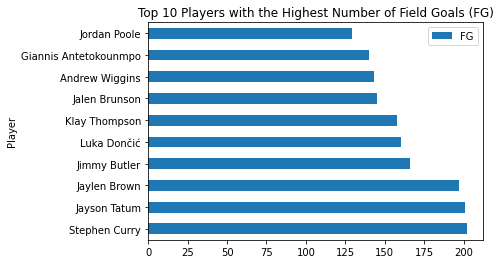

In [10]:
# Creata a horizontal bar plot which depicts 10 players with the highest number of field goals (FG).

df.sort_values(by=['FG'], ascending=False).head(10).plot.barh(x='Player', y='FG', title='Top 10 Players with the Highest Number of Field Goals (FG)')

<AxesSubplot:title={'center':'Average of 3 Points Percentage (3P%) for Each Team'}, xlabel='Team'>

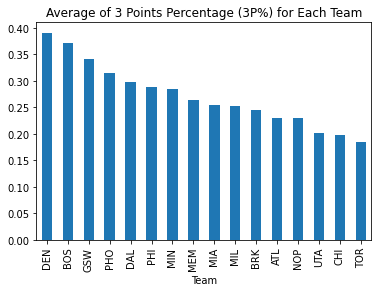

In [33]:
# Create a plot for average of 3 points percentage (3P%) for each team. Use groupby() and mean(). Order the teams by their average 3P%.

df.groupby('Team')['3P%'].mean().sort_values(ascending=False).plot.bar(title='Average of 3 Points Percentage (3P%) for Each Team')
